In [3]:
import numpy as np
import pandas as pd 
import dask.dataframe as dd
import os
import itertools
import matplotlib.pyplot as plt
import plotly.express as px

In [4]:
diretorio = "/media/hdvm03/bd/007/002/007/002"

print("csv_1987_2012")
csv_1987_2012 = pd.read_csv(f'{diretorio}/geral/01_dados_1987_2012.csv', on_bad_lines='skip', low_memory=False)

print("csv_2013_2021")
csv_2013_2020 = pd.read_csv(f'{diretorio}/geral/01_dados_2013_2020.csv', on_bad_lines='skip', low_memory=False)

csv_1987_2012
csv_2013_2021


In [ ]:
csv_1987 = ["AnoBase","DataDefesa", "TituloTese", "GrandeAreaDescricao", "AreaConhecimento", "AreaAvaliacao"]
csv_2013 = ["AN_BASE", "DT_TITULACAO","NM_PRODUCAO", "NM_GRANDE_AREA_CONHECIMENTO", "NM_AREA_CONHECIMENTO", "NM_SUBAREA_CONHECIMENTO", "NM_AREA_CONCENTRACAO", "NM_AREA_AVALIACAO"]

teses = pd.merge(csv_1987_2012, csv_2013_2020, 
                    left_on=  csv_1987,
                    right_on= csv_2013, 
                    how = 'right')

In [67]:
grande_area = csv_2013_2020["NM_GRANDE_AREA_CONHECIMENTO"]
grande_area.unique().tolist()
grande_area.value_counts()

CIÊNCIAS HUMANAS               104715
CIÊNCIAS DA SAÚDE              100291
CIÊNCIAS SOCIAIS APLICADAS      88892
MULTIDISCIPLINAR                80006
ENGENHARIAS                     68564
CIÊNCIAS AGRÁRIAS               63794
CIÊNCIAS EXATAS E DA TERRA      56158
CIÊNCIAS BIOLÓGICAS             42661
LINGÜÍSTICA, LETRAS E ARTES     39658
Name: NM_GRANDE_AREA_CONHECIMENTO, dtype: int64

In [65]:
area_conheci = csv_2013_2020["NM_AREA_CONHECIMENTO"]
area_conheci.value_counts()
quant_area_conheci = area_conheci.unique().tolist()
len(quant_area_conheci)



82

In [60]:
sub_area_conheci = csv_2013_2020["NM_SUBAREA_CONHECIMENTO"]
sub_area_conheci.unique()
sub_area_conheci.value_counts()

NÃO INFORMADO                      266534
NÃO SE APLICA                      225857
CLÍNICA MÉDICA                      18703
SOCIAIS E HUMANIDADES               16739
ENSINO DE CIÊNCIAS E MATEMÁTICA     10161
                                    ...  
GENÉTICA HUMANA E MÉDICA               11
SISTEMAS ELÉTRICOS DE POTÊNCIA          4
METALURGIA DE TRANSFORMAÇÃO             2
BOTÂNICA APLICADA                       1
ECONOMIA MONETÁRIA E FISCAL             1
Name: NM_SUBAREA_CONHECIMENTO, Length: 156, dtype: int64

In [59]:
area_concentra = csv_2013_2020["NM_AREA_CONCENTRACAO"]
area_concentra.unique()
area_concentra.value_counts()




EDUCAÇÃO                                                            21091
NÃO INFORMADO                                                       15125
PRODUÇÃO VEGETAL                                                     5870
QUÍMICA                                                              5384
CIÊNCIA DA COMPUTAÇÃO                                                5236
                                                                    ...  
DIREITO ECONÔMICO E SOCIAL                                              1
EPISTEMOLOGIA E HISTÓRIA DA FÍSICA NA EDUCAÇÃO BÁSICA E SUPERIOR        1
BIOINFORMÁTICA E BIOLOGIA DE SISTEMAS                                   1
HISTÓRIA PÚBLICA                                                        1
MANEJO E  CONSERVAÇÃO DO SOLO E DA ÁGUA                                 1
Name: NM_AREA_CONCENTRACAO, Length: 4834, dtype: int64

In [49]:
area_avalia = csv_2013_2020["NM_AREA_AVALIACAO"]
area_avalia.unique()

array(['ENGENHARIAS I', 'MEDICINA II', 'INTERDISCIPLINAR', 'MEDICINA I',
       'CIÊNCIAS BIOLÓGICAS I', 'LETRAS / LINGUÍSTICA', 'BIODIVERSIDADE',
       'CIÊNCIA DA COMPUTAÇÃO', 'CIÊNCIAS AGRÁRIAS I',
       'ANTROPOLOGIA / ARQUEOLOGIA', 'ENGENHARIAS IV', 'ENGENHARIAS II',
       'MEDICINA VETERINÁRIA', 'CIÊNCIAS SOCIAIS APLICADAS I', 'EDUCAÇÃO',
       'QUÍMICA', 'NUTRIÇÃO', 'CIÊNCIAS AMBIENTAIS',
       'MATEMÁTICA / PROBABILIDADE E ESTATÍSTICA', 'ENGENHARIAS III',
       'ZOOTECNIA / RECURSOS PESQUEIROS', 'ENSINO', 'ODONTOLOGIA',
       'ARTES / MÚSICA', 'GEOCIÊNCIAS', 'ASTRONOMIA / FÍSICA',
       'ADMINISTRAÇÃO, CIÊNCIAS CONTÁBEIS E TURISMO', 'SAÚDE COLETIVA',
       'FARMÁCIA', 'FILOSOFIA/TEOLOGIA:SUBCOMISSÃO FILOSOFIA',
       'CIÊNCIA POLÍTICA E RELAÇÕES INTERNACIONAIS', 'SOCIOLOGIA',
       'DIREITO', 'FILOSOFIA/TEOLOGIA:SUBCOMISSÃO TEOLOGIA', 'PSICOLOGIA',
       'ECONOMIA', 'GEOGRAFIA', 'HISTÓRIA', 'MEDICINA III',
       'PLANEJAMENTO URBANO E REGIONAL / DEMOGRAFIA', 'SERVI

In [5]:
busca1 = csv_1987_2012[csv_1987_2012["TituloTese"].str.contains("mercosul|mercosur", case=False, na=False)]
agrupar_por_ano1 = busca1["TituloTese"].groupby(busca1["AnoBase"])
busca_por_ano1 = agrupar_por_ano1.count()
quant_termos1 = busca_por_ano1.values.tolist()
anos1 = busca_por_ano1.index.tolist()

In [31]:

busca4= csv_2013_2020[csv_2013_2020["NM_PRODUCAO"].str.contains("bolsonaro", case=False, na=False)]
agrupar_por_ano4 = busca4["NM_PRODUCAO"].groupby(busca4["AN_BASE"])
busca_por_ano4 = agrupar_por_ano4.count()
quant_termos4 = busca_por_ano4.values.tolist()
anos4 = busca_por_ano4.index.tolist()



<AxesSubplot:xlabel='AN_BASE'>

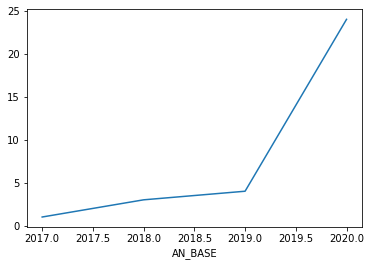

In [32]:
fig_pandas = busca_por_ano4.plot(kind="line", x=anos4, y=quant_termos4)
fig_pandas

In [18]:
fig = px.line(x=anos1, y=quant_termos1, markers="O")

fig.show()

In [9]:
fig = px.line(x=anos4, y=quant_termos4, markers="O")

fig.show()

In [10]:
anos_total = list(range(1992,2021))
print(f'Lista de anos: {anos_total}')
print(f'1992-2012: {quant_termos1}')
print(f'2013-2020: {quant_termos4}')

quant_termos5 = quant_termos1 + quant_termos4
print(f'1992-2020: {quant_termos5}')

Lista de anos: [1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020]
1992-2012: [1, 6, 8, 16, 31, 16, 36, 59, 65, 79, 66, 68, 46, 44, 48, 26, 37, 40, 47, 34, 46]
2013-2020: [30, 34, 43, 38, 36, 42, 33, 22]
1992-2020: [1, 6, 8, 16, 31, 16, 36, 59, 65, 79, 66, 68, 46, 44, 48, 26, 37, 40, 47, 34, 46, 30, 34, 43, 38, 36, 42, 33, 22]


In [11]:
fig = px.line(x=anos_total, y=quant_termos5, markers="O", title="Termo Mercosul por ano")

fig.show()

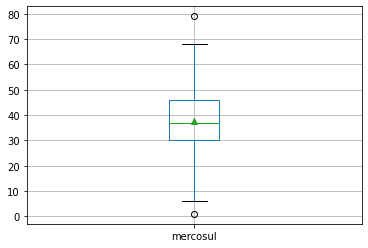

In [12]:
teses_boxplot = pd.DataFrame({"mercosul": quant_termos5})

boxplot = teses_boxplot.boxplot(column="mercosul", showmeans=True)

In [13]:
teses = [anos_total, quant_termos5]
teses_1992_2020 = pd.DataFrame(quant_termos5, anos_total)
teses_total = teses_1992_2020.T


In [14]:
lista_anos = [1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020]

quant_termos_final = [1, 6, 8, 16, 31, 16, 36, 59, 65, 79, 66, 68, 46, 44, 48, 26, 37, 40, 47, 34, 46, 30, 34, 43, 38, 36, 42, 33, 22]

fig = px.line(x=lista_anos, y=quant_termos_final, markers="O", title="Termo Mercosul por ano")

fig.show()